In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/IT 581 Project 2021/Literature Review/Data')
!ls

 ad1d9c58d338e20d09ff26bcc06c4235
'Bank Note Dataset'
 corpus
'House Price Prediction'
'Pima Indian Diabetes'
 sample.csv
'supervised and semi-supervised combined data-Original.ipynb'
 TestCases_TestData.csv
 Text_Sentiment_Classification.ipynb
 Text_Sentiment_Classification-sample.csv.ipynb
'Twitter Sentiment Analysis'
 wiki-news-300d-1M.vec
 wiki-news-300d-1M.vec.zip
 wiki-news-300d-1M.vec.zip.1


In [ ]:
import pandas as pd

In [ ]:
jan= pd.read_csv('output_data1_jan.csv')
feb = pd.read_csv('output_data2_feb.csv')
mar = pd.read_csv('output_data3_mar.csv')
apr = pd.read_csv('output_data8c_apr.csv')
may = pd.read_csv('output_data11a_may.csv')
june = pd.read_csv('output_data11c_june.csv')
july = pd.read_csv('output_data_july1.csv')
aug = pd.read_csv('output_main_data_aug1.csv')
sept = pd.read_csv('output_main_data_sept1.csv')
oct = pd.read_csv('output_data_oct2.csv')

In [ ]:
merge_data = pd.concat([jan,feb,mar,apr,may,june,july,aug,sept,oct])

In [ ]:
merge_data = merge_data.reset_index(drop = True)

In [ ]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099554 entries, 0 to 4099553
Data columns (total 3 columns):
Date    object
id      float64
text    object
dtypes: float64(1), object(2)
memory usage: 93.8+ MB


In [ ]:
merge_data['Date'] = pd.to_datetime(pd.Series(merge_data['Date']))

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
from PIL import Image
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def remove_url(row):
    txt = str(row['text']).split('https')[0]
    return txt

In [ ]:
merge_data['tidy_text'] = merge_data.apply(remove_url, axis = 1)

In [ ]:
merge_data['tidy_text'] = merge_data['text'].str.replace('@[\w:]*','').str.replace('ud83eudd14',"")

In [ ]:
data = merge_data

In [ ]:
data['tidy_text'] = data['tidy_text'].str.replace("RT ", '').str.replace('u201d','').str.replace('nn','').str.replace('amp','mental')
data['tidy_text'] = data['tidy_text'].str.replace('\\','').str.replace('u201c','').str.replace('nu2019t','')
data = data[~data['tidy_text'].astype(str).str.startswith('u')]
data = data[~data['tidy_text'].astype(str).str.contains('ud')]
data = data[~data['tidy_text'].astype(str).str.contains('#')]

In [ ]:
data['tidy_text'] = data['tidy_text'].apply(str)

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data['month'] = pd.DatetimeIndex(data['Date']).month

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742785 entries, 0 to 2742784
Data columns (total 5 columns):
Date         datetime64[ns]
id           float64
text         object
tidy_text    object
month        int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 104.6+ MB


In [ ]:
data['tidy_text'] = data['tidy_text'].apply(lambda x: x.lower())

In [ ]:
data['month'] = data['month'].replace(1,'Jan').replace(2,'Feb').replace(3,'Mar').replace(4,'Apr').replace(5,'May').replace(6,'June').replace(7,'July').replace(8,'Aug').replace(9,'Sept').replace(10,'Oct')

In [ ]:
data.head()

,Date,id,text,tidy_text,month
0,2020-01-10,1.215770e+18,@KariDebbink @Vineet321 The Frieman Scary Sca...,the frieman scary scale makes its debut. wu...,Jan
1,2020-01-11,1.215800e+18,Genome sequence of the new coronavirus associ...,genome sequence of the new coronavirus associ...,Jan
2,2020-01-11,1.215840e+18,Crap,crap,Jan
3,2020-01-11,1.215850e+18,.@hayesluk summarises novel coronavirus lab f...,. summarises novel coronavirus lab findings; ...,Jan
4,2020-01-11,1.215910e+18,China reports 1st death from 'new type of cor...,china reports 1st death from 'new type of cor...,Jan


In [ ]:
frequency = data['month'].value_counts()

In [ ]:
new_freq = pd.DataFrame(frequency)

In [ ]:
new_freq.reset_index(inplace = True)

In [ ]:
new_freq.columns = ['date','frequency']

In [ ]:
new_freq

,date,frequency
0,Apr,479320
1,Mar,446486
2,Feb,408884
3,Jan,403684
4,June,207150
5,Sept,205845
6,May,192861
7,Oct,166032
8,Aug,138677
9,July,93846


In [ ]:
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Tweet Frequency')

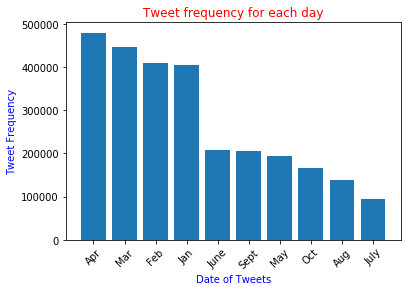

In [ ]:
plt.bar(x = new_freq.date, height= new_freq.frequency)
plt.xticks(rotation = 45)
plt.title('Tweet frequency for each day', color = 'red')
plt.xlabel('Date of Tweets', color = 'blue')
plt.ylabel('Tweet Frequency',color = 'blue')

Data Preprocessing by removing stopwords and Lemmatizing the tweets

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
data['tidy_text'] = data['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
data['tidy_text'] = data['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)> 4]))

In [ ]:
data['tidy_text'] = data['tidy_text'].str.replace('wYxJPGnXe0','').str.replace('onl','').str.replace('KEY','').str.replace('https','').str.replace('VID','')
data = data[~data['tidy_text'].astype(str).str.contains('://')]

In [ ]:
data = data[~data['tidy_text'].astype(str).str.startswith('u')]
data['tidy_text']=data['tidy_text'].replace(['u2019d','u201d','u00eda','u00f3n','u2026'],"",regex = True)

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


data['tidy_text'] = data.tidy_text.apply(lemmatize_text)

In [ ]:
data['tidy_text'] = [','.join(map(str, l)) for l in data['tidy_text']]

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data.count()

Date         1409754
id           1409754
text         1409754
tidy_text    1409754
month        1409754
dtype: int64

In [ ]:
all_words = ' '.join([w for w in data['tidy_text']])

In [ ]:
len(all_words)

62619657

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110,background_color = 'black').generate(all_words)

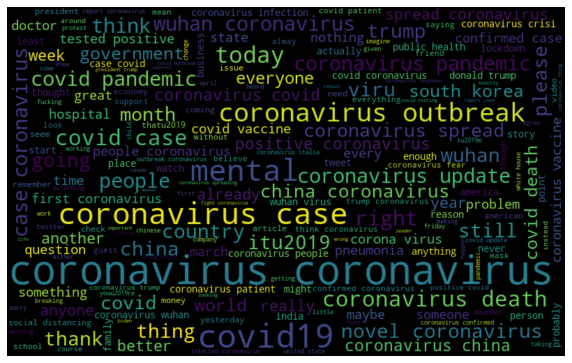

In [ ]:
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
scores = [sid.polarity_scores(i) for i in data.tidy_text]

In [ ]:
df1 = pd.DataFrame(scores)

In [ ]:
df1.count()

neg         1409754
neu         1409754
pos         1409754
compound    1409754
dtype: int64

In [ ]:
data_copy = data

In [ ]:
covid_data = pd.concat([data_copy,df1], axis = 1)

In [ ]:
covid_data.head()

,Date,id,text,tidy_text,month,neg,neu,pos,compound
0,2020-01-10,1.215770e+18,@KariDebbink @Vineet321 The Frieman Scary Sca...,"frieman,scary,scale,make,debut.,wuhan,coronavi...",Jan,0.0,1.0,0.0,0.0
1,2020-01-11,1.215800e+18,Genome sequence of the new coronavirus associ...,"genome,sequence,coronavirus,associated,pneumon...",Jan,0.0,1.0,0.0,0.0
2,2020-01-11,1.215840e+18,Crap,,Jan,0.0,0.0,0.0,0.0
3,2020-01-11,1.216130e+18,China releases genetic data on new coronavirus,"china,release,genetic,coronavirus",Jan,0.0,1.0,0.0,0.0
4,2020-01-12,1.216500e+18,China's mystery 'coronavirus' isn't currently...,"china's,mystery,'coronavirus',currently,spreading",Jan,0.0,1.0,0.0,0.0


In [ ]:
conditions = [(covid_data['compound']>=0.05),(covid_data['compound']<= - 0.05),(covid_data['compound'] > -0.05) & (covid_data['compound'] < 0.05)]
values = ['Positive', 'Negative','Neutral']
covid_data['sentiments'] = np.select(conditions,values)

In [ ]:
covid_data.head()

,Date,id,text,tidy_text,month,neg,neu,pos,compound,sentiments
0,2020-01-10,1.215770e+18,@KariDebbink @Vineet321 The Frieman Scary Sca...,"frieman,scary,scale,make,debut.,wuhan,coronavi...",Jan,0.0,1.0,0.0,0.0,Neutral
1,2020-01-11,1.215800e+18,Genome sequence of the new coronavirus associ...,"genome,sequence,coronavirus,associated,pneumon...",Jan,0.0,1.0,0.0,0.0,Neutral
2,2020-01-11,1.215840e+18,Crap,,Jan,0.0,0.0,0.0,0.0,Neutral
3,2020-01-11,1.216130e+18,China releases genetic data on new coronavirus,"china,release,genetic,coronavirus",Jan,0.0,1.0,0.0,0.0,Neutral
4,2020-01-12,1.216500e+18,China's mystery 'coronavirus' isn't currently...,"china's,mystery,'coronavirus',currently,spreading",Jan,0.0,1.0,0.0,0.0,Neutral


In [ ]:
c1 = (covid_data['sentiments']=='Neutral')
c2 = (covid_data['sentiments'] == 'Positive')
c3 = (covid_data['sentiments'] == 'Negative') 

covid_data['target'] = np.select([c1,c2,c3],[0,1,-1],default = 'Other')

In [ ]:
covid_data.head()

,Date,id,text,tidy_text,month,neg,neu,pos,compound,sentiments,target
0,2020-01-10,1.215770e+18,@KariDebbink @Vineet321 The Frieman Scary Sca...,"frieman,scary,scale,make,debut.,wuhan,coronavi...",Jan,0.0,1.0,0.0,0.0,Neutral,0
1,2020-01-11,1.215800e+18,Genome sequence of the new coronavirus associ...,"genome,sequence,coronavirus,associated,pneumon...",Jan,0.0,1.0,0.0,0.0,Neutral,0
2,2020-01-11,1.215840e+18,Crap,,Jan,0.0,0.0,0.0,0.0,Neutral,0
3,2020-01-11,1.216130e+18,China releases genetic data on new coronavirus,"china,release,genetic,coronavirus",Jan,0.0,1.0,0.0,0.0,Neutral,0
4,2020-01-12,1.216500e+18,China's mystery 'coronavirus' isn't currently...,"china's,mystery,'coronavirus',currently,spreading",Jan,0.0,1.0,0.0,0.0,Neutral,0


In [ ]:
covid_data['sentiments'].value_counts()

Neutral     1389078
Positive      11894
Negative       8782
Name: sentiments, dtype: int64

In [ ]:
sentiment_freq = pd.DataFrame(covid_data['sentiments'].value_counts())

In [ ]:
sentiment_freq.reset_index(inplace = True)

In [ ]:
sentiment_freq.columns = ['sentiments','frequency']

Text(0, 0.5, 'Tweet_frequency')

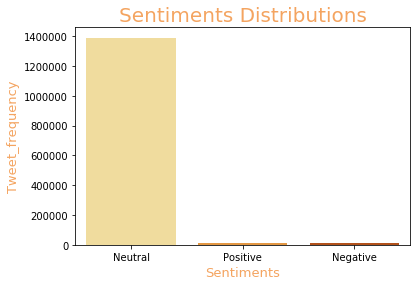

In [ ]:
sns.barplot(x = 'sentiments', y = 'frequency', data = sentiment_freq, palette = "YlOrBr")
plt.title('Sentiments Distributions',fontsize= 20, color = 'sandybrown')
plt.xlabel('Sentiments',fontsize = 13, color = 'sandybrown')
plt.ylabel('Tweet_frequency', fontsize = 13,color = 'sandybrown' )

In [ ]:
df= covid_data

In [ ]:
df = df[['tidy_text','sentiments']]

In [ ]:
xwords = pd.Series(['coronavirus','wuhan','itu2019s','iu2019m','yu2019all','virus','china','people','chinese','think','pneumonia','covid19','covid','italy','country','pandemic','mental','south','korea','outbreak','spread','trump',])

In [ ]:
banned_words = set(word.strip().lower() for word in xwords)

In [ ]:
def delete_banned_words(matchobj):
    word = matchobj.group(0)
    if word.lower() in banned_words:
        return ""
    else:
        return word

In [ ]:
word_pattern = re.compile('\w+')

In [ ]:
df['tidy_text'] = [word_pattern.sub(delete_banned_words,sentence) for sentence in df['tidy_text']]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
from subprocess import check_output
import collections
from keras.preprocessing import sequence
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train, test = train_test_split(df,test_size = 0.3)

# Removing neutral sentiments
train = train[train.sentiments != "Neutral"]
test = test[test.sentiments != 'Neutral']

In [ ]:
train.head()

,tidy_text,sentiments
736075,thanks,Positive
784799,thank,Positive
1381243,honestly,Positive
455726,courtesy,Positive
1275164,dream,Positive


In [ ]:
train_pos = train[ train['sentiments'] == 'Positive']
train_pos = train_pos['tidy_text']
train_neg = train[ train['sentiments'] == 'Negative']
train_neg = train_neg['tidy_text']

Positive words


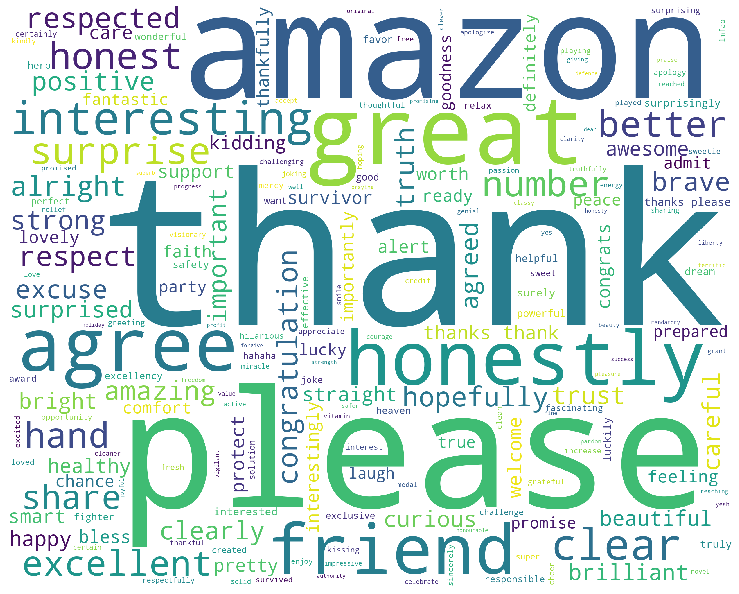

Negative words


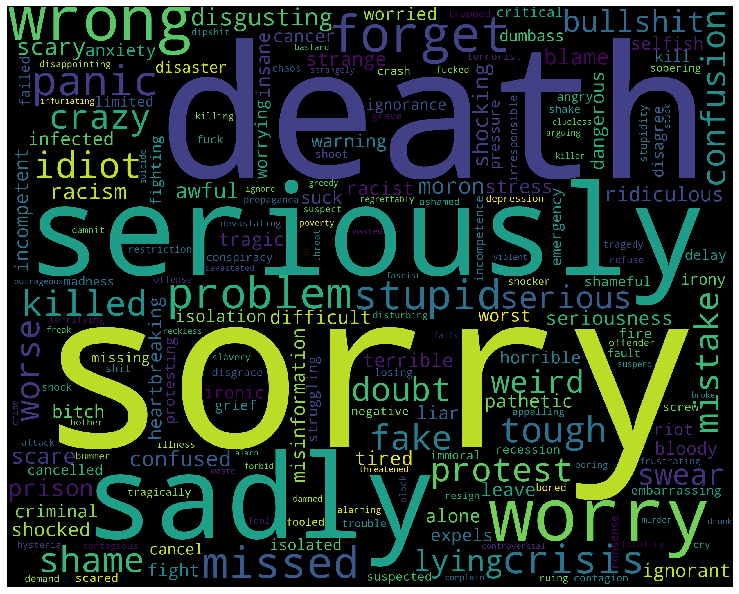

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                          width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [ ]:
df2= covid_data

In [ ]:
labelled_data = covid_data[0:100]

In [ ]:
labelled_data.head()

,Date,id,text,tidy_text,month,neg,neu,pos,compound,sentiments,target
0,2020-01-10,1.215770e+18,@KariDebbink @Vineet321 The Frieman Scary Sca...,"frieman,scary,scale,make,debut.,wuhan,coronavi...",Jan,0.0,1.0,0.0,0.0,Neutral,0
1,2020-01-11,1.215800e+18,Genome sequence of the new coronavirus associ...,"genome,sequence,coronavirus,associated,pneumon...",Jan,0.0,1.0,0.0,0.0,Neutral,0
2,2020-01-11,1.215840e+18,Crap,,Jan,0.0,0.0,0.0,0.0,Neutral,0
3,2020-01-11,1.216130e+18,China releases genetic data on new coronavirus,"china,release,genetic,coronavirus",Jan,0.0,1.0,0.0,0.0,Neutral,0
4,2020-01-12,1.216500e+18,China's mystery 'coronavirus' isn't currently...,"china's,mystery,'coronavirus',currently,spreading",Jan,0.0,1.0,0.0,0.0,Neutral,0


In [ ]:
label_data = labelled_data[['tidy_text','target']]

In [ ]:
df = label_data

In [ ]:
unlabelled_data = covid_data['tidy_text'][111::]

In [ ]:
df1 = unlabelled_data

In [ ]:
df1.reset_index(drop = True)

0          cases!,better,declare,outbreak,coronavirus,int...
1                                                coronavirus
2          youu2019re,hoping,coronavirus,kill,everyone,it...
3                           antidote,coronavirus,apparently.
4                                                           
                                 ...                        
1409638                                               course
1409639                                                     
1409640     yes....,covid-19,weight,prevented,fitting,jeans.
1409641     super-spreaders,covid-19,patient,cause,infection
1409642                                    first,since,march
Name: tidy_text, Length: 1409643, dtype: object

In [ ]:
df1 = pd.DataFrame(df1)

In [ ]:
df1 = df1.reset_index(drop = True)

In [ ]:
df1.head()

,tidy_text
0,"cases!,better,declare,outbreak,coronavirus,int..."
1,coronavirus
2,"youu2019re,hoping,coronavirus,kill,everyone,it..."
3,"antidote,coronavirus,apparently."
4,


In [ ]:
from sklearn.model_selection import RepeatedKFold
import sys

In [ ]:
def feature_gen(f):
    maxlen=0
    word_freqs=collections.Counter()
    num_recs=0

    for line in f:
        words=nltk.word_tokenize(str(line).lower())
        if len(words)>maxlen:
            maxlen=len(words)
        for word in words:
            word_freqs[word] +=1
        num_recs +=1

    MAX_FEATURES=17000
    MAX_SENTENCE_LENGTH =50
    #La entrada para la RNN son palabras indexadas con su numero de frecuencia en el documento, ademas consideramos 2 etiquetas para palabras que no se encuentran en el corpus
    #vocab_size = min(MAX_FEATURES, len(word_freqs))+2
    word2index = {x[0]: i+2 for i,x in enumerate(word_freqs.most_common(MAX_FEATURES))}
    word2index["PAD"]=0
    word2index["UNK"]=1
    #index2word={v:k for k, v in word2index.items()}
    #Preparamos nuestros datos para darlos como entrada en la RNN
    X=np.empty((num_recs,),dtype=list)
    train = f
    i=0
    for line in train:
        words=nltk.word_tokenize(str(line).lower())
        seqs=[]
        for word in words:
            if word in word2index:
                #print(word)
                #print(word2index[word])
                seqs.append(word2index[word])
            else:
                seqs.append(word2index["UNK"])
        #print(i)
        #print(seqs)
        X[i]=seqs
        i += 1
    X=sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)
    #print(type(X))
    #print(X.size)
    return X, word_freqs

In [ ]:
#nltk.download('punkt')
#f= train.tidy_text
#Xtrain, word_freqs = feature_gen(f)
#y1 = train.target

#f= test.tidy_text
#Xtest, word_freqs = feature_gen(f)

#y_train = train.target
#y_test = test.target
f = df.tidy_text
X, word_freqs = feature_gen(f)
y = df.target.astype('category')

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from numpy import mean,std

In [ ]:
dict_classifiers = {
    "Nearest Neighbors":KNeighborsClassifier(3),
    "Support Vector Machine 1":SVC(kernel="linear", C=0.025),
    "Support Vector Machine 2":SVC(gamma=2, C=1),
    #NuSVC(probability=True),
    "Gradient Process Classifier":GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "MLP": MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost":AdaBoostClassifier(),
    "GaussianNB":GaussianNB(),
    "LinearDiscriminant":LinearDiscriminantAnalysis(),
    "QuadraticDiscriminant":QuadraticDiscriminantAnalysis(),
    "GradientBoost":GradientBoostingClassifier(),
    "LogisticRegression":LogisticRegression(),
    "MultinomialNB":MultinomialNB(),
    "SGD":SGDClassifier(),
    "LGBM":LGBMClassifier(),
    "XGB":XGBClassifier()
}


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(70, 50) (70,) (30, 50) (30,)


In [ ]:
def evaluation_matrix(model, testX, testy):
    # predict probabilities for test set
    yhat_probs = model.predict(testX)
    #print(yhat_probs)
    # predict crisp classes for test set
    #yhat_classes = model.predict_classes(testX)
    # reduce to 1d array
    #yhat_probs = yhat_probs[:, 0]
    #print(yhat_probs)
    #yhat_classes = yhat_classes
    yhat_classes = yhat_probs
    #accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, yhat_classes)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(testy, yhat_classes, average='weighted')
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(testy, yhat_classes, average='weighted')
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, yhat_classes, average='weighted')
    print('F1 score: %f' % f1)
    # kappa
    kappa = cohen_kappa_score(testy, yhat_classes)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    #auc = roc_auc_score(testy, yhat_probs, multi_class = 'ovr')
    #print('ROC AUC: %f' % auc)
    #confusion matrix
    matrix = confusion_matrix(testy, yhat_classes)
    print(matrix)
    return accuracy, precision, recall, f1, kappa

In [ ]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 17, verbose = True):
#def batch_classify(X_train, Y_train, X_test, no_classifiers = 11, verbose = True):
    """
    This method, takes as input the X, Y matrices of the Train and Test set.
    And fits them on all of the Classifiers specified in the dict_classifier.
    Usually, the SVM, Random Forest and Gradient Boosting Classifier take quiet some time to train. 
    So it is best to train them on a smaller dataset first and 
    decide whether you want to comment them out or not based on the test accuracy score.
    """
    
    dict_models = {}
    for classifier_name,classifier in list(dict_classifiers.items())[:no_classifiers]:
        #t_start = time.clock()
        classifier.fit(X_train, Y_train)
        #t_end = time.clock()
        accuracy, precision, recall, f1, kappa = evaluation_matrix(classifier, X_test, Y_test)
        #t_diff = t_end - t_start
        #train_score = classifier.score(X_train, Y_train)
        #test_score = classifier.score(X_test, Y_test)
        #print(classifier.predict(X_test))
        #dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        #dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score}
        dict_models[classifier_name] = {'model': classifier, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'Kappa': kappa}
        #dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'train_time': t_diff}
        #if verbose:
        #    print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
            
    return dict_models

In [ ]:
def display_dict_models(dict_models, sort_by='Accuracy'):
#def display_dict_models(dict_models, sort_by='train_score'):
    cls = [key for key in dict_models.keys()]
    accuracy = [dict_models[key]['Accuracy'] for key in cls]
    precision = [dict_models[key]['Precision'] for key in cls]
    recall = [dict_models[key]['Recall'] for key in cls]
    f1 = [dict_models[key]['F1'] for key in cls]
    kappa = [dict_models[key]['Kappa'] for key in cls]
    #training_t = [dict_models[key]['train_time'] for key in cls]
    
    #df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),6)), columns = ['classifier', 'Accuracy', 'Precision', 'Recall', 'F1', 'Kappa'])
    # df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),3)), columns = ['classifier', 'train_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'Accuracy'] = accuracy[ii]
        df_.loc[ii, 'Precision'] = precision[ii]
        df_.loc[ii, 'Recall'] = recall[ii]
        df_.loc[ii, 'F1'] = f1[ii]
        df_.loc[ii, 'Kappa'] = kappa[ii]
       
        #df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))
    return df_

In [ ]:
models = batch_classify(x_train, y_train, x_test, y_test)

Accuracy: 0.766667
Precision: 0.709877
Recall: 0.766667
F1 score: 0.737179
Cohens kappa: 0.041096
[[ 0  2  0]
 [ 2 23  0]
 [ 1  2  0]]
Accuracy: 0.766667
Precision: 0.709877
Recall: 0.766667
F1 score: 0.737179
Cohens kappa: 0.041096
[[ 0  2  0]
 [ 2 23  0]
 [ 1  2  0]]
Accuracy: 0.833333
Precision: 0.694444
Recall: 0.833333
F1 score: 0.757576
Cohens kappa: 0.000000
[[ 0  2  0]
 [ 0 25  0]
 [ 0  3  0]]
Accuracy: 0.833333
Precision: 0.694444
Recall: 0.833333
F1 score: 0.757576
Cohens kappa: 0.000000
[[ 0  2  0]
 [ 0 25  0]
 [ 0  3  0]]
Accuracy: 0.633333
Precision: 0.719697
Recall: 0.633333
F1 score: 0.673759
Cohens kappa: -0.003040
[[ 0  2  0]
 [ 1 19  5]
 [ 2  1  0]]
Accuracy: 0.833333
Precision: 0.694444
Recall: 0.833333
F1 score: 0.757576
Cohens kappa: 0.000000
[[ 0  2  0]
 [ 0 25  0]
 [ 0  3  0]]
Accuracy: 0.766667
Precision: 0.755128
Recall: 0.766667
F1 score: 0.758954
Cohens kappa: 0.125000
[[ 0  2  0]
 [ 2 22  1]
 [ 0  2  1]]
Accuracy: 0.766667
Precision: 0.684524
Recall: 0.76666

In [ ]:
df = display_dict_models(models)

,classifier,Accuracy,Precision,Recall,F1,Kappa
2,Support Vector Machine 2,0.833333,0.694444,0.833333,0.757576,0.000000
3,Gradient Process Classifier,0.833333,0.694444,0.833333,0.757576,0.000000
5,Random Forest,0.833333,0.694444,0.833333,0.757576,0.000000
10,QuadraticDiscriminant,0.800000,0.770513,0.800000,0.784967,0.246862
0,Nearest Neighbors,0.766667,0.709877,0.766667,0.737179,0.041096
15,LGBM,0.766667,0.805128,0.766667,0.768954,0.128631
6,MLP,0.766667,0.755128,0.766667,0.758954,0.125000
7,AdaBoost,0.766667,0.684524,0.766667,0.723270,-0.071429
1,Support Vector Machine 1,0.766667,0.709877,0.766667,0.737179,0.041096
11,GradientBoost,0.733333,0.679012,0.733333,0.705128,-0.100917


In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df

,classifier,Accuracy,Precision,Recall,F1,Kappa
0,Nearest Neighbors,0.766667,0.709877,0.766667,0.737179,0.041096
1,Support Vector Machine 1,0.766667,0.709877,0.766667,0.737179,0.041096
2,Support Vector Machine 2,0.833333,0.694444,0.833333,0.757576,0.000000
3,Gradient Process Classifier,0.833333,0.694444,0.833333,0.757576,0.000000
4,Decision Tree,0.633333,0.719697,0.633333,0.673759,-0.003040
5,Random Forest,0.833333,0.694444,0.833333,0.757576,0.000000
6,MLP,0.766667,0.755128,0.766667,0.758954,0.125000
7,AdaBoost,0.766667,0.684524,0.766667,0.723270,-0.071429
8,GaussianNB,0.066667,0.281624,0.066667,0.066420,-0.127517
9,LinearDiscriminant,0.733333,0.733333,0.733333,0.733333,0.090909
